In [2]:
from breeze_connect import BreezeConnect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import scipy.stats
from numpy import sqrt, log, exp, pi
import datetime

In [4]:
#Set up the connection

In [5]:
breeze = BreezeConnect(api_key = 'ge528J31807C23m1138209727YT28K7*')

In [6]:
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("ge528J31807C23m1138209727YT28K7*"))


https://api.icicidirect.com/apiuser/login?api_key=ge528J31807C23m1138209727YT28K7%2A


In [7]:
breeze.generate_session(api_secret="7$`4002714a8v&50&014906179j^4881",
                        session_token="13013160")

In [22]:
#get option historical data

In [8]:
from_date = "2023-05-01"
to_date = "2023-06-01"
expiry_date = "2023-06-01"

In [9]:
d = breeze.get_historical_data(interval="1day",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date=expiry_date,
                            right="call",
                            strike_price="18300")


In [10]:
#d['Success']
opd = pd.DataFrame([[x['datetime'][:10],expiry_date, x['right'], int(x['strike_price']), float(x['open']), float(x['high']), float(x['low']), float(x['close']), int(x['volume'])] 
              for x in d['Success']], columns = ['Date', 'expiry_date', 'right', 'strike_price', 'open', 'high', 'low', 'close', 'volume']).set_index('Date')

In [11]:
opd

,expiry_date,right,strike_price,open,high,low,close,volume
Date,,,,,,,,
2023-05-02,2023-06-01,Call,18300,223.90,223.90,159.45,229.05,3050
2023-05-03,2023-06-01,Call,18300,135.55,147.00,127.80,162.10,3200
2023-05-04,2023-06-01,Call,18300,132.60,210.45,132.45,133.45,8800
2023-05-05,2023-06-01,Call,18300,160.00,178.85,127.00,200.95,16600
2023-05-08,2023-06-01,Call,18300,140.70,224.95,140.70,132.20,31600
2023-05-09,2023-06-01,Call,18300,219.95,242.50,184.90,204.45,32650
2023-05-10,2023-06-01,Call,18300,207.85,228.00,180.00,200.00,30050
2023-05-11,2023-06-01,Call,18300,238.05,244.60,205.50,222.70,62550
2023-05-12,2023-06-01,Call,18300,174.75,218.45,150.00,218.60,140100


In [12]:
#get underlying historical data

In [13]:
d = breeze.get_historical_data_v2(interval="1day",
                            from_date= from_date+"T07:00:00.000Z",
                            to_date= to_date+"T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE")

nd = pd.DataFrame([[x['datetime'][:10],  float(x['close']), int(x['volume'])] 
              for x in d['Success']], columns = ['Date', 'n-close', 'n-volume']).set_index('Date')


In [14]:
nd

,n-close,n-volume
Date,,
2023-05-02,18136.05,0
2023-05-03,18082.70,0
2023-05-04,18255.80,0
2023-05-05,18069.95,0
2023-05-08,18269.75,0
2023-05-09,18258.30,0
2023-05-10,18311.00,0
2023-05-11,18304.50,0
2023-05-12,18312.20,0


In [15]:
#merge option and underlying price data in a single dataframe

In [16]:
d = opd.join(nd, how='inner')
d

,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume
Date,,,,,,,,,,
2023-05-02,2023-06-01,Call,18300,223.90,223.90,159.45,229.05,3050,18136.05,0
2023-05-03,2023-06-01,Call,18300,135.55,147.00,127.80,162.10,3200,18082.70,0
2023-05-04,2023-06-01,Call,18300,132.60,210.45,132.45,133.45,8800,18255.80,0
2023-05-05,2023-06-01,Call,18300,160.00,178.85,127.00,200.95,16600,18069.95,0
2023-05-08,2023-06-01,Call,18300,140.70,224.95,140.70,132.20,31600,18269.75,0
2023-05-09,2023-06-01,Call,18300,219.95,242.50,184.90,204.45,32650,18258.30,0
2023-05-10,2023-06-01,Call,18300,207.85,228.00,180.00,200.00,30050,18311.00,0
2023-05-11,2023-06-01,Call,18300,238.05,244.60,205.50,222.70,62550,18304.50,0
2023-05-12,2023-06-01,Call,18300,174.75,218.45,150.00,218.60,140100,18312.20,0


In [17]:
# Convert string to date and get time to expiry

In [18]:
format = '%Y-%m-%d'
d['expiry_date'] = d.apply(lambda x: datetime.datetime.strptime(x['expiry_date'], format).date(), axis=1)
d.reset_index(inplace=True)
d['Date'] = d.apply(lambda x: datetime.datetime.strptime(x['Date'], format).date(), axis=1)
d['T'] = d.apply(lambda x: (x['expiry_date']-x['Date']).days, axis=1)
d

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T
0,2023-05-02,2023-06-01,Call,18300,223.90,223.90,159.45,229.05,3050,18136.05,0,30
1,2023-05-03,2023-06-01,Call,18300,135.55,147.00,127.80,162.10,3200,18082.70,0,29
2,2023-05-04,2023-06-01,Call,18300,132.60,210.45,132.45,133.45,8800,18255.80,0,28
3,2023-05-05,2023-06-01,Call,18300,160.00,178.85,127.00,200.95,16600,18069.95,0,27
4,2023-05-08,2023-06-01,Call,18300,140.70,224.95,140.70,132.20,31600,18269.75,0,24
5,2023-05-09,2023-06-01,Call,18300,219.95,242.50,184.90,204.45,32650,18258.30,0,23
6,2023-05-10,2023-06-01,Call,18300,207.85,228.00,180.00,200.00,30050,18311.00,0,22
7,2023-05-11,2023-06-01,Call,18300,238.05,244.60,205.50,222.70,62550,18304.50,0,21
8,2023-05-12,2023-06-01,Call,18300,174.75,218.45,150.00,218.60,140100,18312.20,0,20
9,2023-05-15,2023-06-01,Call,18300,195.10,283.35,171.55,200.25,224750,18384.60,0,17


In [19]:
#Method to compute Implied Volatility using Newton Raphson method

In [20]:
N_prime = scipy.stats.norm.pdf
N = scipy.stats.norm.cdf

def bs_price(c_p, S, K, T, r, sigma):
    '''
    :param c_p: call or put option
    :param S: Asset price
    :param K: Strike price
    :param T: Time to maturity
    :param r: risk-free rate
    :param sigma: volatility
    :return: call price
    '''

    ###standard black-scholes formula
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if c_p == 'Call':
        price = S * N(d1) -  N(d2)* K * np.exp(-r * T)
    elif c_p == 'Put':
        price = N(-d2) * K * exp(-r*T) - N(-d1) * S
    else:
        price = 0
    return price

def vega(S, K, T, r, sigma):
    '''

    :param S: Asset price
    :param K: Strike price
    :param T: Time to Maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: partial derivative w.r.t volatility
    '''

    ### calculating d1 from black scholes
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))

    
    vega = S  * np.sqrt(T) * N_prime(d1)
    return vega



def implied_volatility(c_p, P, S, K, T, r, tol=0.0001,
                            max_iterations=100):
    '''

    :param C: price
    :param S: Asset price
    :param K: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param tol: error tolerance in result
    :param max_iterations: max iterations to update vol
    :return: implied volatility in percent
    '''


    ### assigning initial volatility estimate for input in Newton_rap procedure
    sigma = 0.3

    for i in range(max_iterations):

        ### calculate difference between blackscholes price and market price with
        ### iteratively updated volality estimate
        diff = bs_price(c_p, S, K, T, r, sigma) - P

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / vega(S, K, T, r, sigma)

    return sigma

def greeks(c_p, S, K, T, r, sigma):

    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))

    delta = N(d1) if c_p=='Call' else -N(-d1)
    gamma = N_prime(d1)/(S*sigma*np.sqrt(T))
    vega = S*np.sqrt(T)*N_prime(d1)
    
    return delta, gamma, vega

In [21]:
#compute implied volatility for every row

In [22]:
d['IV'] = d.apply(lambda x: implied_volatility(x['right'], x['close'], x['n-close'], x['strike_price'], x['T']/360, 0.06), axis=1)

found on 2th iteration
difference is equal to 3.112551155481924e-06
found on 3th iteration
difference is equal to 4.675371201301459e-11
found on 2th iteration
difference is equal to 2.7124483324314497e-05
found on 3th iteration
difference is equal to 7.105427357601002e-12
found on 2th iteration
difference is equal to 4.747322856246683e-05
found on 2th iteration
difference is equal to 1.095770585379796e-09
found on 3th iteration
difference is equal to 7.275957614183426e-12
found on 2th iteration
difference is equal to 2.9094390640693746e-05
found on 2th iteration
difference is equal to 5.6978883009151104e-05
found on 3th iteration
difference is equal to 8.920378604670987e-07
found on 2th iteration
difference is equal to 9.384848453919403e-11
found on 2th iteration
difference is equal to 1.373341376620374e-06
found on 3th iteration
difference is equal to 7.838707460905425e-11
found on 2th iteration
difference is equal to 9.812051393964794e-05
found on 2th iteration
difference is equal to

C:\Users\Anuko\AppData\Local\Temp\ipykernel_7640\2187662688.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma - diff / vega(S, K, T, r, sigma)
C:\Users\Anuko\AppData\Local\Temp\ipykernel_7640\2187662688.py:16: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
C:\Users\Anuko\AppData\Local\Temp\ipykernel_7640\2187662688.py:39: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))


In [23]:
d

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T,IV
0,2023-05-02,2023-06-01,Call,18300,223.90,223.90,159.45,229.05,3050,18136.05,0,30,0.126056
1,2023-05-03,2023-06-01,Call,18300,135.55,147.00,127.80,162.10,3200,18082.70,0,29,0.107388
2,2023-05-04,2023-06-01,Call,18300,132.60,210.45,132.45,133.45,8800,18255.80,0,28,0.055083
3,2023-05-05,2023-06-01,Call,18300,160.00,178.85,127.00,200.95,16600,18069.95,0,27,0.135424
4,2023-05-08,2023-06-01,Call,18300,140.70,224.95,140.70,132.20,31600,18269.75,0,24,0.058238
5,2023-05-09,2023-06-01,Call,18300,219.95,242.50,184.90,204.45,32650,18258.30,0,23,0.103257
6,2023-05-10,2023-06-01,Call,18300,207.85,228.00,180.00,200.00,30050,18311.00,0,22,0.087659
7,2023-05-11,2023-06-01,Call,18300,238.05,244.60,205.50,222.70,62550,18304.50,0,21,0.105936
8,2023-05-12,2023-06-01,Call,18300,174.75,218.45,150.00,218.60,140100,18312.20,0,20,0.104565
9,2023-05-15,2023-06-01,Call,18300,195.10,283.35,171.55,200.25,224750,18384.60,0,17,0.075527


In [24]:
#plot

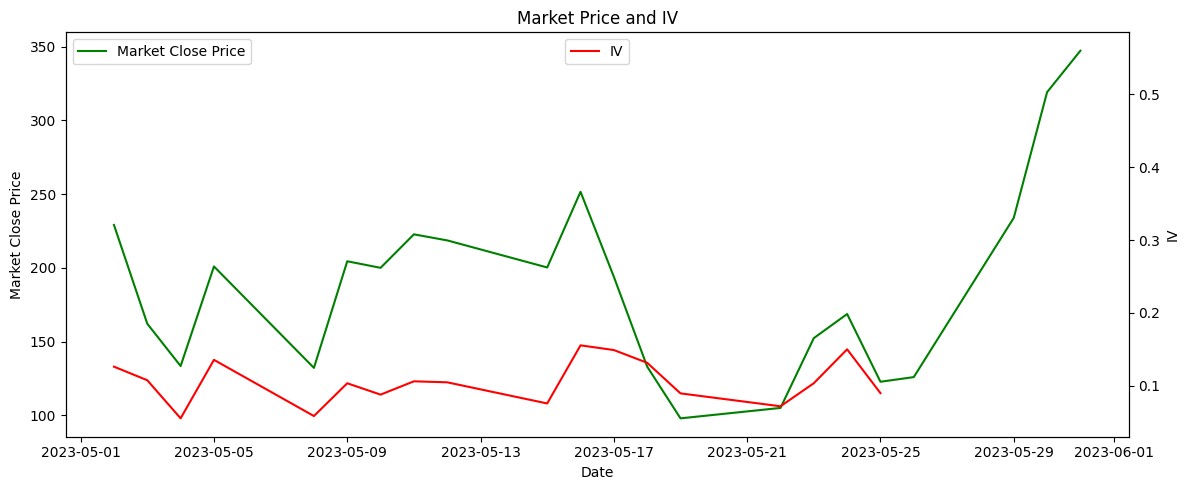

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Market Price and IV')
ax.set_xlabel('Date')
ax.plot(d['Date'], d['close'], color='green')
ax2.plot(d['Date'], d['IV'], color='red')
ax.set_ylabel('Market Close Price')
ax2.set_ylabel('IV')
ax.legend(['Market Close Price'])
ax2.legend(['IV'], loc='upper center')
plt.tight_layout()
plt.show()

In [26]:
# get data for put option

In [27]:
p_hist = breeze.get_historical_data(interval="1day",
                            from_date= from_date,
                            to_date= to_date,
                            stock_code="NIFTY",
                            exchange_code="NFO",
                            product_type="options",
                            expiry_date=expiry_date,
                            right="put",
                            strike_price="18300")


In [28]:
p_hist['Success']
opd = pd.DataFrame([[x['datetime'][:10],expiry_date, x['right'], int(x['strike_price']), float(x['open']), float(x['high']), float(x['low']), float(x['close']), int(x['volume'])] 
              for x in p_hist['Success']], columns = ['Date', 'expiry_date', 'right', 'strike_price', 'open', 'high', 'low', 'close', 'volume']).set_index('Date')

In [29]:
d2= opd.join(nd, how='inner')
d2

,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume
Date,,,,,,,,,,
2023-05-02,2023-06-01,Put,18300,257.85,259.50,240.00,753.80,1650,18136.05,0
2023-05-03,2023-06-01,Put,18300,302.00,320.25,269.00,250.30,4600,18082.70,0
2023-05-04,2023-06-01,Put,18300,292.70,292.70,193.85,279.65,15300,18255.80,0
2023-05-05,2023-06-01,Put,18300,229.10,302.30,215.75,199.80,5650,18069.95,0
2023-05-08,2023-06-01,Put,18300,255.95,259.95,174.65,297.25,22450,18269.75,0
2023-05-09,2023-06-01,Put,18300,173.45,204.45,153.70,189.65,45800,18258.30,0
2023-05-10,2023-06-01,Put,18300,172.45,215.45,165.95,185.05,58150,18311.00,0
2023-05-11,2023-06-01,Put,18300,149.40,184.75,149.40,170.05,85800,18304.50,0
2023-05-12,2023-06-01,Put,18300,180.00,223.10,148.90,161.55,201900,18312.20,0


In [30]:
format = '%Y-%m-%d'
d2['expiry_date'] = d2.apply(lambda x: datetime.datetime.strptime(x['expiry_date'], format).date(), axis=1)
d2.reset_index(inplace=True)
d2['Date'] = d2.apply(lambda x: datetime.datetime.strptime(x['Date'], format).date(), axis=1)
d2['T'] = d2.apply(lambda x: (x['expiry_date']-x['Date']).days, axis=1)
d2

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T
0,2023-05-02,2023-06-01,Put,18300,257.85,259.50,240.00,753.80,1650,18136.05,0,30
1,2023-05-03,2023-06-01,Put,18300,302.00,320.25,269.00,250.30,4600,18082.70,0,29
2,2023-05-04,2023-06-01,Put,18300,292.70,292.70,193.85,279.65,15300,18255.80,0,28
3,2023-05-05,2023-06-01,Put,18300,229.10,302.30,215.75,199.80,5650,18069.95,0,27
4,2023-05-08,2023-06-01,Put,18300,255.95,259.95,174.65,297.25,22450,18269.75,0,24
5,2023-05-09,2023-06-01,Put,18300,173.45,204.45,153.70,189.65,45800,18258.30,0,23
6,2023-05-10,2023-06-01,Put,18300,172.45,215.45,165.95,185.05,58150,18311.00,0,22
7,2023-05-11,2023-06-01,Put,18300,149.40,184.75,149.40,170.05,85800,18304.50,0,21
8,2023-05-12,2023-06-01,Put,18300,180.00,223.10,148.90,161.55,201900,18312.20,0,20
9,2023-05-15,2023-06-01,Put,18300,159.30,182.20,101.90,159.15,384900,18384.60,0,17


In [31]:
d2['IV'] = d2.apply(lambda x: implied_volatility(x['right'], x['close'], x['n-close'], x['strike_price'], x['T']/360, 0.06), axis=1)

found on 2th iteration
difference is equal to -6.821210263296962e-13
found on 3th iteration
difference is equal to 1.6945591596595477e-09
found on 2th iteration
difference is equal to 1.4779288903810084e-12
found on 3th iteration
difference is equal to 1.2512978344147996e-05
found on 2th iteration
difference is equal to 1.2696546036750078e-09
found on 2th iteration
difference is equal to 1.4495071809506044e-12
found on 2th iteration
difference is equal to 1.8372527108567738e-05
found on 2th iteration
difference is equal to 1.546805032148768e-05
found on 2th iteration
difference is equal to 2.9651583815848426e-05
found on 3th iteration
difference is equal to 2.7824853532365523e-11
found on 2th iteration
difference is equal to 3.1494091956574266e-07
found on 3th iteration
difference is equal to 4.718003765447065e-12
found on 3th iteration
difference is equal to 1.477208684264042e-07
found on 2th iteration
difference is equal to 9.268254871130921e-06
found on 2th iteration
difference is e

In [32]:
d2

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T,IV
0,2023-05-02,2023-06-01,Put,18300,257.85,259.50,240.00,753.80,1650,18136.05,0,30,0.342680
1,2023-05-03,2023-06-01,Put,18300,302.00,320.25,269.00,250.30,4600,18082.70,0,29,0.086818
2,2023-05-04,2023-06-01,Put,18300,292.70,292.70,193.85,279.65,15300,18255.80,0,28,0.147731
3,2023-05-05,2023-06-01,Put,18300,229.10,302.30,215.75,199.80,5650,18069.95,0,27,0.055727
4,2023-05-08,2023-06-01,Put,18300,255.95,259.95,174.65,297.25,22450,18269.75,0,24,0.169293
5,2023-05-09,2023-06-01,Put,18300,173.45,204.45,153.70,189.65,45800,18258.30,0,23,0.110617
6,2023-05-10,2023-06-01,Put,18300,172.45,215.45,165.95,185.05,58150,18311.00,0,22,0.123124
7,2023-05-11,2023-06-01,Put,18300,149.40,184.75,149.40,170.05,85800,18304.50,0,21,0.114994
8,2023-05-12,2023-06-01,Put,18300,180.00,223.10,148.90,161.55,201900,18312.20,0,20,0.114018
9,2023-05-15,2023-06-01,Put,18300,159.30,182.20,101.90,159.15,384900,18384.60,0,17,0.138972


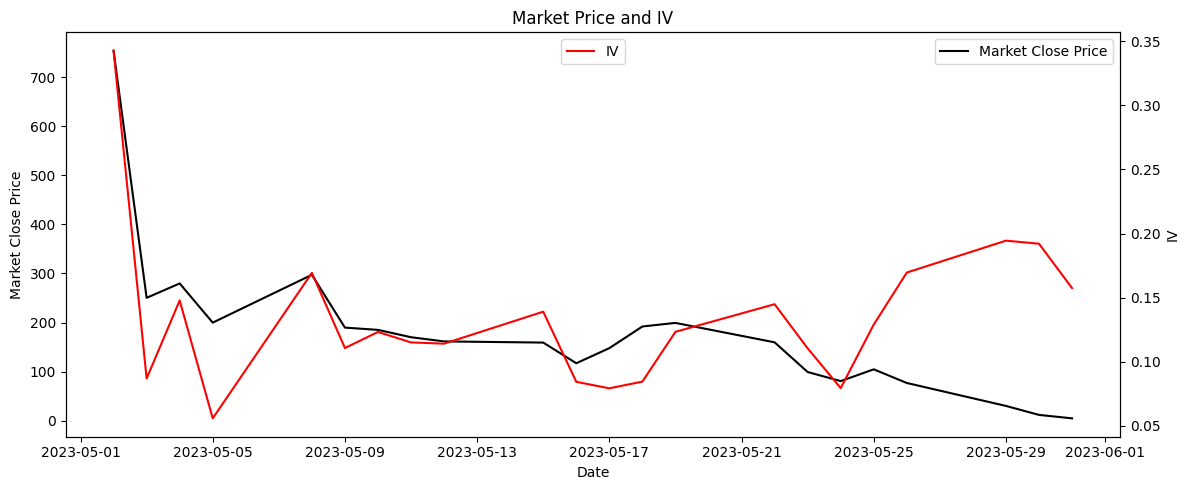

In [33]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Market Price and IV')
ax.set_xlabel('Date')
ax.plot(d2['Date'], d2['close'], color='black')
ax2.plot(d2['Date'], d2['IV'], color='red')
ax.set_ylabel('Market Close Price')
ax2.set_ylabel('IV')
ax.legend(['Market Close Price'])
ax2.legend(['IV'], loc='upper center')
plt.tight_layout()
plt.show()

In [34]:
# create a straddle -  buy call option with strike 18350 and put with strike 18350

In [35]:
d['Date'][4] == datetime.date(2023,5,8)

True

In [36]:
call = float(d[d['Date']==datetime.date(2023,5,8)]['close'])
put = float(d2[d2['Date']==datetime.date(2023,5,8)]['close'])
print('call price is {} and put price is {}, hence, total cost is {}'.format(call, put, (call+put)))

call price is 132.2 and put price is 297.25, hence, total cost is 429.45


In [37]:
d['Profit'] = d['close']-call

In [38]:
d2['Profit'] = d2['close']-put

In [39]:
Profit = d['Profit'] + d2['Profit']

In [40]:
d

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T,IV,Profit
0,2023-05-02,2023-06-01,Call,18300,223.90,223.90,159.45,229.05,3050,18136.05,0,30,0.126056,96.85
1,2023-05-03,2023-06-01,Call,18300,135.55,147.00,127.80,162.10,3200,18082.70,0,29,0.107388,29.90
2,2023-05-04,2023-06-01,Call,18300,132.60,210.45,132.45,133.45,8800,18255.80,0,28,0.055083,1.25
3,2023-05-05,2023-06-01,Call,18300,160.00,178.85,127.00,200.95,16600,18069.95,0,27,0.135424,68.75
4,2023-05-08,2023-06-01,Call,18300,140.70,224.95,140.70,132.20,31600,18269.75,0,24,0.058238,0.00
5,2023-05-09,2023-06-01,Call,18300,219.95,242.50,184.90,204.45,32650,18258.30,0,23,0.103257,72.25
6,2023-05-10,2023-06-01,Call,18300,207.85,228.00,180.00,200.00,30050,18311.00,0,22,0.087659,67.80
7,2023-05-11,2023-06-01,Call,18300,238.05,244.60,205.50,222.70,62550,18304.50,0,21,0.105936,90.50
8,2023-05-12,2023-06-01,Call,18300,174.75,218.45,150.00,218.60,140100,18312.20,0,20,0.104565,86.40
9,2023-05-15,2023-06-01,Call,18300,195.10,283.35,171.55,200.25,224750,18384.60,0,17,0.075527,68.05


In [41]:
d2

,Date,expiry_date,right,strike_price,open,high,low,close,volume,n-close,n-volume,T,IV,Profit
0,2023-05-02,2023-06-01,Put,18300,257.85,259.50,240.00,753.80,1650,18136.05,0,30,0.342680,456.55
1,2023-05-03,2023-06-01,Put,18300,302.00,320.25,269.00,250.30,4600,18082.70,0,29,0.086818,-46.95
2,2023-05-04,2023-06-01,Put,18300,292.70,292.70,193.85,279.65,15300,18255.80,0,28,0.147731,-17.60
3,2023-05-05,2023-06-01,Put,18300,229.10,302.30,215.75,199.80,5650,18069.95,0,27,0.055727,-97.45
4,2023-05-08,2023-06-01,Put,18300,255.95,259.95,174.65,297.25,22450,18269.75,0,24,0.169293,0.00
5,2023-05-09,2023-06-01,Put,18300,173.45,204.45,153.70,189.65,45800,18258.30,0,23,0.110617,-107.60
6,2023-05-10,2023-06-01,Put,18300,172.45,215.45,165.95,185.05,58150,18311.00,0,22,0.123124,-112.20
7,2023-05-11,2023-06-01,Put,18300,149.40,184.75,149.40,170.05,85800,18304.50,0,21,0.114994,-127.20
8,2023-05-12,2023-06-01,Put,18300,180.00,223.10,148.90,161.55,201900,18312.20,0,20,0.114018,-135.70
9,2023-05-15,2023-06-01,Put,18300,159.30,182.20,101.90,159.15,384900,18384.60,0,17,0.138972,-138.10


In [42]:
#declare a 2d array to understand how much profit would come from buying and selling at a particular date

In [43]:
pl = np.zeros((d.shape[0], d.shape[0]), dtype=float)

In [44]:
#buying a straddle on i and selling on j
for i in range(pl.shape[0]):
    cost = d.iloc[i]['close'] + d2.iloc[i]['close']
    for j in range(i, pl.shape[0]):
        pl[i][j]= d.iloc[j]['close'] + d2.iloc[j]['close'] - cost


In [45]:
pl

array([[ 0.0000e+00, -5.7045e+02, -5.6975e+02, -5.8210e+02, -5.5340e+02,
        -5.8875e+02, -5.9780e+02, -5.9010e+02, -6.0270e+02, -6.2345e+02,
        -6.1425e+02, -6.4110e+02, -6.5785e+02, -6.8560e+02, -7.1810e+02,
        -7.3130e+02, -7.3350e+02, -7.5540e+02, -7.8005e+02, -7.1890e+02,
        -6.5200e+02, -6.3090e+02],
       [ 0.0000e+00,  0.0000e+00,  7.0000e-01, -1.1650e+01,  1.7050e+01,
        -1.8300e+01, -2.7350e+01, -1.9650e+01, -3.2250e+01, -5.3000e+01,
        -4.3800e+01, -7.0650e+01, -8.7400e+01, -1.1515e+02, -1.4765e+02,
        -1.6085e+02, -1.6305e+02, -1.8495e+02, -2.0960e+02, -1.4845e+02,
        -8.1550e+01, -6.0450e+01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -1.2350e+01,  1.6350e+01,
        -1.9000e+01, -2.8050e+01, -2.0350e+01, -3.2950e+01, -5.3700e+01,
        -4.4500e+01, -7.1350e+01, -8.8100e+01, -1.1585e+02, -1.4835e+02,
        -1.6155e+02, -1.6375e+02, -1.8565e+02, -2.1030e+02, -1.4915e+02,
        -8.2250e+01, -6.1150e+01],
       [ 0.0000e+00

In [46]:
from tabulate import tabulate

In [47]:
table = tabulate(pl, tablefmt='fancy_grid')

In [48]:
print(table)

╒═══╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ 0 │ -570.45 │ -569.75 │ -582.1  │ -553.4  │ -588.75 │ -597.8  │ -590.1  │ -602.7  │ -623.45 │ -614.25 │ -641.1  │ -657.85 │ -685.6  │ -718.1  │ -731.3  │ -733.5  │ -755.4  │ -780.05 │ -718.9  │ -652    │ -630.9  │
├───┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 0 │    0    │    0.7  │  -11.65 │   17.05 │  -18.3  │  -27.35 │  -19.65 │  -32.25 │  -53    │  -43.8  │  -70.65 │  -87.4  │ -115.15 │ -147.65 │ -160.85 │ -163.05 │ -184.95 │ -209.6  │ -148.45 │  -81.55 │  -60.45 │
├───┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─